**Intro**

'''

Re: External Experiment

Dear Analyst,

Our R&D folks are curious about whether you can uncover the effect of "removing" a member of a covert network. The question is simple. What if we took out one member--say, gave him a free Netflix subscription or got him hooked on playing a particularly addictive video game. What would the resulting effect on the network as a whole be? How would we choose the best person to target? What would be the effect of the intervention be?

Let us know what you find out.

Thanks,

Smith

'''

**Basics**

Analyze a covert social network to determine who the weakest link is, and what happens to the network when you remove that link. 

Provide notes and a write-up, which should include at least some level of visualization.

Do what you need to do to import them and make sense of them. Some contain dynamic data over time--while you are welcome to take one of these on, it may be easier to just focus on the network during its most connected period (usually at or near the end of the time series). How would you figure out the most effective node to remove. You can do this theoretically, or experimentally (remove the node and re-run the network metrics) or some combination of both.

**Let's Begin**

First, lets pull in our network from 'http://www.casos.cs.cmu.edu/tools/datasets/external/index.php#covert'

I will be using data from Baseball Steroid Use

Background info: When the Mitchell Report on steroid use in Major League Baseball [MLB], was published people were surprised at both the number and names of those who were mentioned. The dataset was created from data found in the Mitchell Report. Baseball players are shown as green nodes. Those who were found to be providers of steroids and other illegal performance enhancing substances appear as red nodes. The links reveal the flow of chemicals -- from providers to players. See http://orgnet.com/steroids.html

In [19]:
!pip install networkx matplotlib

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# upload baseball dataset
csv_file_path = 'BASEBALL_1M.csv'

In [22]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
print(df)

         Unnamed: 0  Victor_Conte  Jeremy_Giambi  Jason_Giambi  \
0      Victor_Conte             1              1             1   
1     Jeremy_Giambi             1              1             1   
2      Jason_Giambi             1              1             2   
3    Gary_Sheffield             1              1             2   
4   Bobby_Estalella             0              0             1   
..              ...           ...            ...           ...   
67        Mike_Bell             0              0             0   
68     Bart_Miadich             0              0             0   
69       Jim_Parque             0              0             0   
70       Phil_Hiatt             0              0             0   
71     Denny_Neagle             0              0             0   

    Gary_Sheffield  Bobby_Estalella  Benito_Santiago  Marvin_Bernard  \
0                1                0                0               0   
1                1                0                0           

The CSV file is structured as an adjacency matrix where rows and columns represent individuals (players and possibly providers), and cell values indicate connections or interactions (such as the flow of chemicals from providers to players). A value greater than 0 suggests a link between the individuals represented by the row and column.

In [23]:
# Convert the adjacency matrix to a list of edges
edges = []
for i, row in df.iterrows():
    for j, col in enumerate(df.columns[1:]):  # Skip the first column as it's the index/name column
        if df.iloc[i, j + 1] > 0:  # j+1 to account for the skipped first column
            edges.append((df.columns[j + 1], row['Unnamed: 0']))  # (Target, Source)

In [24]:
# Create the graph
G = nx.Graph()
G.add_edges_from(edges)

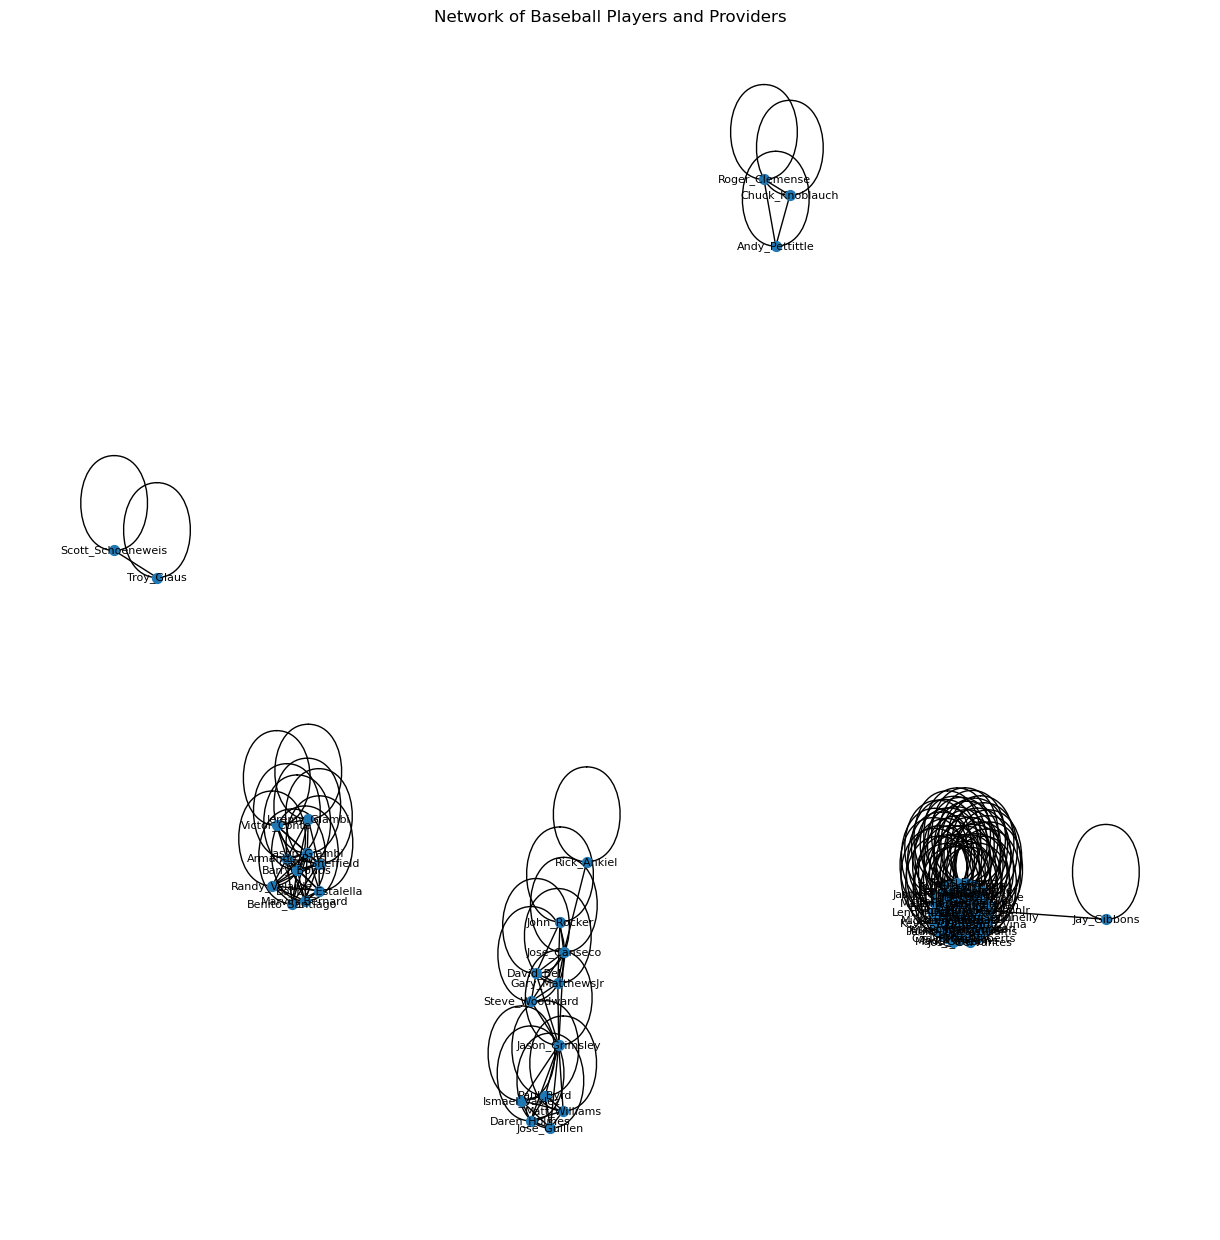

In [25]:
# Plot the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # For consistent layout between plots
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
plt.title("Network of Baseball Players and Providers")
plt.show()

In [26]:
# Step 2: Determine the weakest link (the edge with the fewest connections)
degrees = nx.degree(G)
min_degree = min(degrees, key=lambda x: x[1])
print(f"Weakest link based on minimum degree: {min_degree}")

Weakest link based on minimum degree: ('Troy_Glaus', 3)


The network of baseball players and providers has been plotted above. 

We see that the "weakest link" (or the node with the the fewest connections) is 'Troy_Glaus' with 3 connections. 

Next step is to remove Troy and re-plot

In [27]:
# Remove 'Troy_Glaus' from the graph to simulate removing the weakest links
G.remove_node('Troy_Glaus')

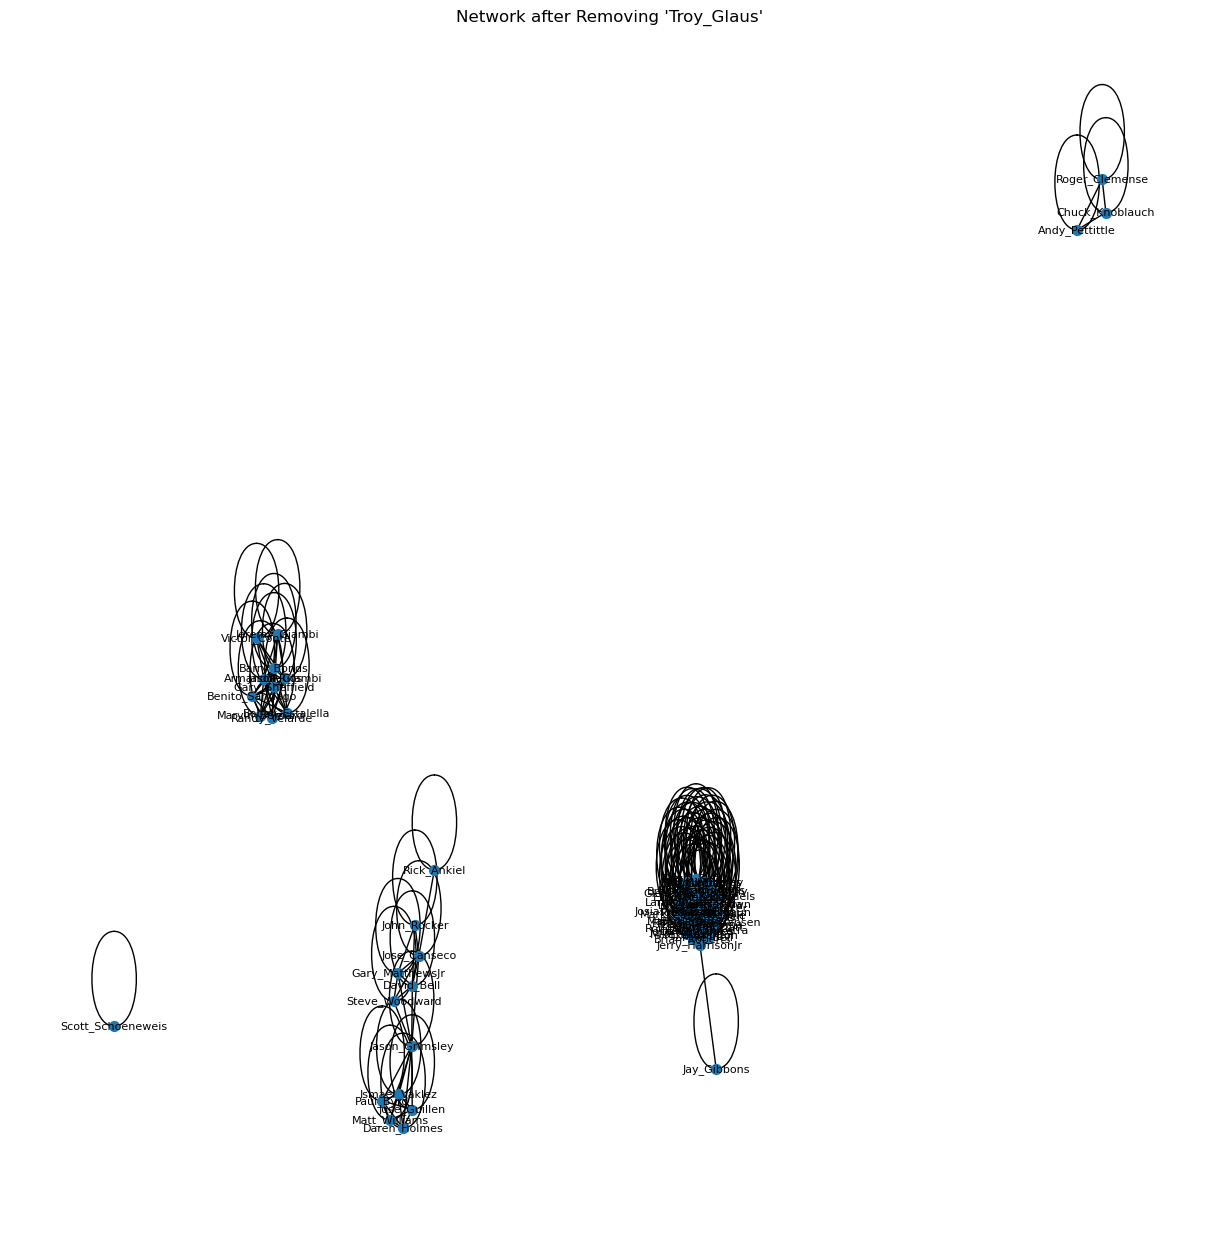

In [28]:
# Plot the network again after removing 'Troy_Glaus'
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42) 
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
plt.title("Network after Removing 'Troy_Glaus'")
plt.show()

I don't think this really changed things much. We are seeing similar plots, but this visualization demonstrates how the network's structure changes with the removal of this node, potentially simulating the impact of removing a weakly connected individual from the network.